## The purpose of this notebook is to explore the results of the prediction of HAAFPs of all compounds in the PubChem database
#### The analysis includes:
>* Show the general distribution of FPs over the whole PubChem database
>* Divide the results in categories from very low to very high FPs
>* Explore the most common functional groups found in each category
>* Export examples of compounds with very high FPs
>* Search for non-obvious examples of "very high" and "very low" HAAFPs
>* Clustering? 

## We need to consider separating code that takes a long time to run from code that aims to show results in real time. 
#### For example: Sampling 1000 compounds 10 times for each category, getting the functional group counts and calculating mean and SDs takes a very long time. The output can be stored as a csv file.
#### Then, generating the upsetplots that take the averages of the above files is very fast and it is the most important sections in terms of showing the results.   

In [1]:
#pip install pubchempy cf_list

In [2]:
#pip install upsetplot

In [3]:
#conda install -c rdkit rdkit=2019.09.1

In [4]:
#pip install pandas==1.2.4

In [4]:
import pandas as pd
import numpy as np
import itertools
import random
random.seed(17)
import matplotlib.pyplot as plt

import pubchempy as pcp

import rdkit
from rdkit import Chem
from rdkit.Chem import Fragments as fr
from rdkit.Chem import PandasTools

import upsetplot 
from upsetplot import plot as uplot
from upsetplot import generate_counts
from upsetplot import from_memberships


In [5]:
def show_romol(df):
    cid_list = list(df["CID"])
    properties = ['IUPACName','CanonicalSMILES','MolecularFormula']
    show_df = pd.DataFrame(pcp.get_properties(properties, cid_list, 'cid'))
    show_df = pd.concat([df,show_df],axis = 1)
    PandasTools.AddMoleculeColumnToFrame(show_df, smilesCol='CanonicalSMILES', includeFingerprints=False)
    show_df = show_df[["CID","log10_TCAA","log10_DCAA","IUPACName","ROMol"]]
    return show_df

#### Results are joined in single dataframe 

In [6]:
result_df1 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA1.csv")
result_df2 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA2.csv")
result_df3 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA3.csv")
result_df4 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA4.csv")
result_df5 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA5.csv")
print("5")
result_df6 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA6.csv")
result_df7 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA7.csv")
result_df8 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA8.csv")
result_df9 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA9.csv")
result_df10 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA10.csv")
print("10")
result_df11 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA11.csv")
result_df12 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA12.csv")
# result_df1 = pd.read_csv("/Users/andrescordero/Downloads/PubChem_data/result_TCAA_DCAA1.csv")
# result_df2 = pd.read_csv("/Users/andrescordero/Downloads/PubChem_data/result_TCAA_DCAA2.csv")
# result_df3 = pd.read_csv("/Users/andrescordero/Downloads/PubChem_data/result_TCAA_DCAA3.csv")
# result_df4 = pd.read_csv("/Users/andrescordero/Downloads/PubChem_data/result_TCAA_DCAA4.csv")
# result_df5 = pd.read_csv("/Users/andrescordero/Downloads/PubChem_data/result_TCAA_DCAA5.csv")
# print("...")
# result_df6 = pd.read_csv("/Users/andrescordero/Downloads/PubChem_data/result_TCAA_DCAA6.csv")
# result_df7 = pd.read_csv("/Users/andrescordero/Downloads/PubChem_data/result_TCAA_DCAA7.csv")
# result_df8 = pd.read_csv("/Users/andrescordero/Downloads/PubChem_data/result_TCAA_DCAA8.csv")
# result_df9 = pd.read_csv("/Users/andrescordero/Downloads/PubChem_data/result_TCAA_DCAA9.csv")
# result_df10 = pd.read_csv("/Users/andrescordero/Downloads/PubChem_data/result_TCAA_DCAA10.csv")
# print("...")
# result_df11 = pd.read_csv("/Users/andrescordero/Downloads/PubChem_data/result_TCAA_DCAA11.csv")
# result_df12 = pd.read_csv("/Users/andrescordero/Downloads/PubChem_data/result_TCAA_DCAA12.csv")
# print("done")

5
10


In [7]:
result_df = pd.concat([result_df1,result_df2,result_df3,result_df4,result_df5,result_df6,result_df7,result_df8,result_df9,result_df10,result_df11,result_df12], axis=0)
#result_df = pd.read_csv("/Users/andrescordero/Downloads/result_TCAA_DCAA_May20_newPC.csv")

In [8]:
result_df.shape


(111390281, 3)

In [9]:
result_df.head(5)

,CID,TCAA,DCAA
0,49788089,6.057471,2.514149
1,10383,6.057471,2.514149
2,84709621,6.030990,2.325763
3,84711920,5.997079,2.541426
4,44154570,5.988623,2.553638


In [11]:
# show_romol(result_df[result_df["log10_TCAA"] > 2.5])

#### Results were initially calculated as a natural logarithm so two more formats are added
raw <-- expressed as mmol/mol

log10 <---- expressed as logarithm (base 10)

In [10]:
result_df.shape
result_df["raw_TCAA"] = np.exp(result_df["TCAA"])-1
print("ok")
result_df["log10_TCAA"] = np.log10(result_df["raw_TCAA"])
print("ok")
result_df["raw_DCAA"] = np.exp(result_df["DCAA"])-1
result_df["log10_DCAA"] = np.log10(result_df["raw_DCAA"])

ok
ok


## 1. General trend 

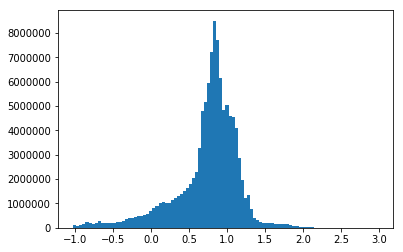

In [11]:
plt.hist(result_df["log10_TCAA"], bins=100, range=(-1,3),
                       bottom=None, histtype='bar',
                       align='left', rwidth=1,
                       color=None)
# plt.savefig("data/dcaa_distribution_all.pdf")
plt.show()

In [12]:
# (result_df["log10_TCAA"] > 2.4).sum()

In [13]:
# int_df = result_df[(result_df["log10_TCAA"] >= 2.0) & (result_df["log10_TCAA"] < 2.4)]
#highs_df.to_csv("data/highTCAAFPs_newMay22.csv")

## 2. Split into categories 

#### from "very low" to "very high" FPs

In [14]:
# ((result_df["log10_TCAA"] >= 2.0) & (result_df["log10_TCAA"] < 2.5)).sum()

In [15]:
# result_df_ordered_by_TCAA = result_df

In [16]:
# result_df_ordered_by_DCAA = result_df.sort_values(by = ["log10_DCAA"], ascending = False)

In [17]:
# result_df = result_df_ordered_by_DCAA

In [18]:
div_per_str_list = ["2.0~","1.5~2.0","1.0~1.5","0.5~1.0","0~0.5","~0.0"]
def get_division(result_slice):
    """Acceptable parameters are results for DCAA or TCAA (i.e.,result_df["log10_TCAA"])"""   
    div_list = [(result_slice >= 2.0).sum()
                    ,(result_slice >= 1.5).sum()
                    ,(result_slice >= 1.0).sum()
                    ,(result_slice >= 0.5).sum()
                    ,(result_slice >= 0.0).sum()
                   ,(result_slice > -1000000000).sum()]
    div_per_list = [float(i)/float(len(result_df))*100 for i in div_list]
    """The function returns a tuple including div_list and div_per_list"""
    """div_per_str_list is used in other function so it is defined outside"""
    return div_list, div_per_list

In [19]:
# div_list_TCAA, div_per_list_TCAA = get_division(result_slice = result_df["log10_TCAA"])
div_list_DCAA, div_per_list_DCAA = get_division(result_slice = result_df["log10_DCAA"])

## 3. Get counts for functional groups

#### Each category contains millions of compounds, so we decided to take random samples to analyse the presence of functional groups

In [20]:
#### run get_division with DCAA or TCAA to create the neccesary variables


In [21]:
## There are no compounds with DCAAFPs> 2log units and only a few above 1.5. 
### Thus a different k_list is necessary for random sampling. 
k_list_DCAA = [int(div_list_DCAA[0]),10000,10000,10000,10000,10000,10000] ## do we need k_list? 

In [22]:
def divideNumber(dataframe, div_per_list):
    """ Number is number of compounds in each category???"""
    number = len(dataframe)
    div_number_list =  [0] + [int(float(i)/float(100)*float(number)) for i in div_per_list]
    return div_number_list

In [23]:
def createRandom(div_number_list, size):
    random_list = []
    for i in range(0,len(div_number_list)-1):
        if div_number_list[i+1] - div_number_list[i] > size:
            tem_k = size
        else:
            tem_k = div_number_list[i+1] - div_number_list[i]
        random_list.append(sorted(random.sample(range(div_number_list[i],div_number_list[i+1]), k=tem_k)))
    return random_list

In [24]:
def createRandomDic(dataframe, size, functional_group_list, div_per_list, isOneGroup=True):
    """ Takes dataframe as input, that dataframe should contain CIDs, SMILES & Romol are calculated during dic """
    random_dic = {}
    random_list = []
    if not isOneGroup:
        random_list = createRandom(divideNumber(dataframe, div_per_list), size)  ### Lets modify createRandomDic() so that it can be use for the category of choice
    else:
        random_list.append(sorted(random.sample(range(len(dataframe)), k=size)))
        #print(random_list)
    properties = ['IUPACName','CanonicalSMILES','MolecularFormula']
    for i in range(len(random_list)):
        tem_df = dataframe.iloc[random_list[i]]
        if len(tem_df) != 0:
            tem_df = pd.DataFrame(pcp.get_properties(properties, list(tem_df["CID"]), 'cid'))
            PandasTools.AddMoleculeColumnToFrame(tem_df, smilesCol='CanonicalSMILES', includeFingerprints=False)
            tem2_df = create_functional_group_df(tem_df, functional_group_list)
            tem2_df = pd.concat([tem_df,tem2_df],axis = 1)
        else:
            tem2_df = tem_df
        random_dic[div_per_str_list[i]] = tem2_df
    return random_dic

In [25]:
def create_functional_group_df(dataframe, functional_group_list):
    """"get the counts of functional groups in the functional group list for a given  list of compounds in dataframe"""
    
    functional_group_df = pd.DataFrame(columns = functional_group_list)
    dataframe = dataframe.dropna(subset=['ROMol'])
    dataframe.reset_index(drop=True, inplace=True)
    for i in range(len(dataframe)):
        a = fr.fr_phenol(dataframe["ROMol"][i])
        b = fr.fr_methoxy(dataframe["ROMol"][i])
        c = fr.fr_ketone(dataframe["ROMol"][i])
        d = fr.fr_aniline(dataframe["ROMol"][i])
        e = fr.fr_benzene(dataframe["ROMol"][i])
        functional_group_df.loc[i] = [a,b,c,d,e]
    return functional_group_df

In [26]:
# functional_group_list = ["phenol","methoxy","ketone","aniline","benzene"]
# div_number_list = divideNumber(result_df, div_per_list = div_per_list_TCAA) 
# random_list = createRandom(div_number_list, 10000)
# random_dic_tcaa = createRandomDic(result_df, 10000, functional_group_list,div_per_list_TCAA, isOneGroup = False)

In [27]:
# random_dic_tcaa

In [28]:
functional_group_list = ["phenol","methoxy","ketone","aniline","benzene"]

In [29]:
def createSource(functional_group_df):
    l = functional_group_list
    c_f_tuple = []
    c_f_list = []
    data_list = []
    for i in range(1,len(l)+1):
        c_f_tuple = c_f_tuple + list(itertools.combinations(l, i))
    for i in c_f_tuple:
        c_f_list.append(list(i))
    c_f_list.append([])
    for i in c_f_list: 
        count = 0
        for j in range(0,len(functional_group_df)):
            if list(pd.DataFrame(functional_group_df.iloc[j,5:][functional_group_df.iloc[j,5:]>0]).index) == i:            
                count = count + 1
        data_list.append(count)            
    return data_list

#### The purpose of "c_f_list" is to get a list of all possible combinations of the functional groups that are evaluated

In [30]:


def create_c_f_list():
    l = functional_group_list
    c_f_tuple = []
    c_f_list = []
    data_list = []
    for i in range(1,len(l)+1):
        c_f_tuple = c_f_tuple + list(itertools.combinations(l, i))
    
    for i in c_f_tuple:
        c_f_list.append(list(i))
    c_f_list.append([])
    return c_f_list
c_f_list = create_c_f_list()

### This portion creates 10 lists of 10000 random compounds for each category. The purpose is to determine if 10000 is a sufficiently large sample to be representative of each category. 

In [31]:
# len(random_dic_tcaa)

In [32]:
# random_dic_tcaa.keys()

In [33]:
###  random_dic_test = createRandomDic(dataframe = result_df,
#                                  size = 10000, 
#                                  functional_group_list = functional_group_list, 
#                                  div_per_list = div_per_list_TCAA, 
#                                  isOneGroup=False)

In [34]:
# random_dic_test.keys()

In [35]:



def main():
    times = 10
    source_one_time = {}
    source_10times = []
    for i in range(times):
        source_one_time = {}
        random_dic = createRandomDic(dataframe = result_df,
                                     size = 10000, 
                                     functional_group_list = functional_group_list, 
                                     div_per_list = div_per_list_TCAA, isOneGroup=False)
        print(str(i+1) + "time")
        for j in range(len(random_dic)):
            print(str(div_per_str_list[j]) + "FP")
            functional_group_df = random_dic[div_per_str_list[j]]
            source_one_time[div_per_str_list[j]] = createSource(functional_group_df)
        source_10times.append(source_one_time)  
    print("finish create source")
    

In [36]:
times = 10
source_one_time = {}
source_10times = []
for i in range(times):
    source_one_time = {}
    random_dic = createRandomDic(dataframe = result_df,
                                 size = 10000, 
                                 functional_group_list = functional_group_list, 
                                 div_per_list = div_per_list_DCAA, isOneGroup=False)
    print(str(i+1) + "time")
    for j in range(len(random_dic)):
        print(str(div_per_str_list[j]) + "FP")
        functional_group_df = random_dic[div_per_str_list[j]]
        source_one_time[div_per_str_list[j]] = createSource(functional_group_df)
    source_10times.append(source_one_time)  
print("finish create source")

1time
2.0~FP
1.5~2.0FP
1.0~1.5FP
0.5~1.0FP
0~0.5FP
~0.0FP
2time
2.0~FP
1.5~2.0FP
1.0~1.5FP
0.5~1.0FP
0~0.5FP
~0.0FP


URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

#### The purpose is to store the mean values, standard deviations and coeffecients of variance in the functional group counts for each category.

In [ ]:
source_result_df_dic.keys()

In [ ]:
####calculate MN, SD, CV and store

source_result_df_dic = {}
source_result_list = []
source_one_fp_list = []
for j in range(len(random_dic)):
    source_result_list = []
    source_one_fp_list = []
    for i in range(times):
        source_one_fp_list.append(source_10times[i][div_per_str_list[j]])
    source_one_fp_list_t = np.array(source_one_fp_list).T.tolist() 
    for i in source_one_fp_list_t:
        tem = np.array(i)
        source_result_list.append([int(tem.mean()),tem.std(),tem.std()/tem.mean()])
    source_result_list = np.array(source_result_list).T.tolist()
    source_result_df_dic[div_per_str_list[j]] = pd.DataFrame(source_result_list,index = ["MN","SD","CV"])
    
for i in div_per_str_list:
    source_result_df_dic[i].to_csv("data/" + str(i) + "May28_dcaa.csv",header=True,index=False)

In [ ]:
# ### rerun to get DCAA
# div_number_list = divideNumber(div_per_list_tcaa) 
# random_list = CreateRandom(div_number_list, 100000)
# random_dic_tcaa = createRandomDic(result_df, functional_group_list, isOneGroup = False)

#### Here, we import the data from each category were it is defined and listed 

In [122]:
veryhigh_df = pd.read_csv("data/2.0~May28_tcaa.csv")
high_df = pd.read_csv("data/1.5~2.0May28_dcaa.csv")
highint_df = pd.read_csv("data/1.0~1.5May28_dcaa.csv")
lowint_df = pd.read_csv("data/0.5~1.0May28_dcaa.csv")
low_df = pd.read_csv("data/0~0.5May28_dcaa.csv")
verylow_df = pd.read_csv("data/~0.0May28_dcaa.csv")



#### Upsetplot requires a list of the counts to be included (not all are included because in each category (i.e., low high etc) so here we create lists appropiate depending of the category of choice. 

In [123]:
def df_to_upset(data):
    data_list = list(data.iloc[0])
    source = from_memberships(
    c_f_list,
    data=data_list
    )
    data_df = pd.DataFrame({"categories" : c_f_list , "counts" : data_list})
    return data_df

#### Categories with no counts should not appear in the plot

In [124]:
def clean(data_df):
    """data has to be a dataframe"""
    clean_data = data_df[data_df['counts'] != 0]
    return clean_data

def get_source(data):
    source = from_memberships(data["categories"],data = data["counts"])
    return source

In [125]:
data = veryhigh_df

In [126]:
data_df = df_to_upset(data)
clean_data = clean(data_df)
clean_source = get_source(clean_data)

# clean_source = from_memberships(   ####delete after confiming function works
#     data_clean["categories"],
#     data= data_clean["counts"]
#     )

#### Counts of functional groups are best shown as UpSet plots. The purpose of the function "show_figure1" is to build the upsetplot

In [127]:
def get_upsetplot(clean_source, title = ""):

    font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 18,
            }



    plot = uplot(clean_source, 
                            orientation='horizontal', 
                            sort_by='cardinality', 
                            #sort_categories_by='cardinality', 
                            subset_size='auto', 
                            sum_over=None, 
                            facecolor='black', 
                            with_lines=True, 
                            element_size=40, 
                            intersection_plot_elements=15, 
                            totals_plot_elements=5, 
                            show_counts='', 
                            show_percentages=True,
                    )

    plt.yticks(size=20)
    # plt.delaxes(low_plot["totals"])                    #get rid of "single" counts
    plot["totals"].set_title("single")
    plot["intersections"].grid(b = None)
    plot["totals"].grid(b = None)
    plt.title(str(title), fontdict = font)
    plt.ylabel("Counts", fontdict = font)
    #plt.subplot_tool()
    plt.savefig("data/" + str(title) + ".pdf")
    return plt.show()



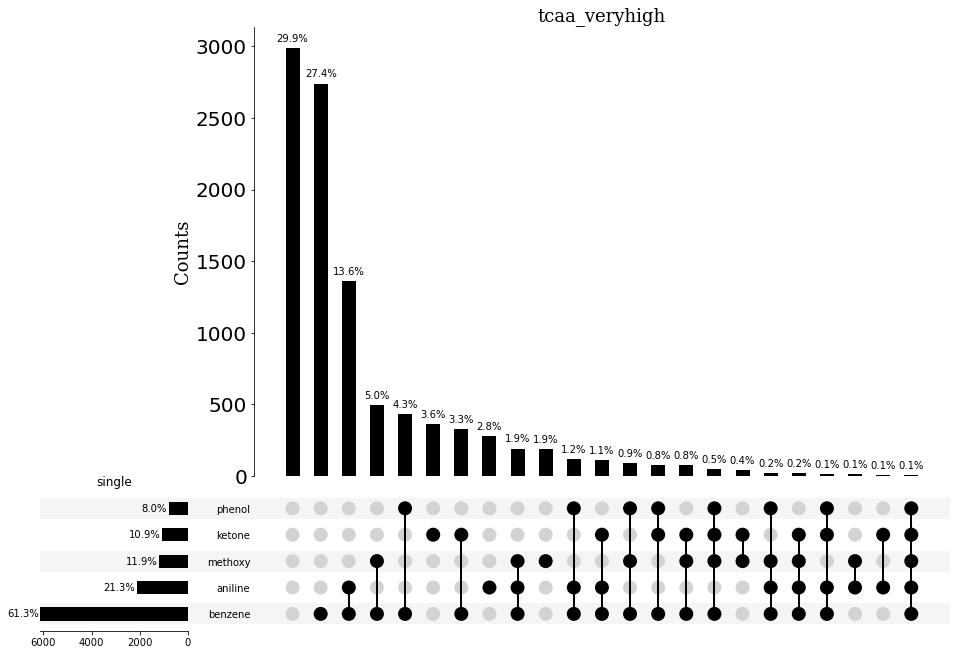

In [128]:
get_upsetplot(clean_source, title = "tcaa_veryhigh")

#### Unused-old lines that need to be checked

In [ ]:
# random_dic[div_per_str_list[0]]

In [ ]:
# result_df.iloc[random_list[0]]

In [ ]:
# for i in range(len(random_dic)):
#     title = div_per_str_list[i]
#     functional_group_df = random_dic[div_per_str_list[i]]
#     show_figure1(functional_group_df,title)

In [ ]:
# upsetplot.UpSet(data_clean, orientation='horizontal', sort_by='degree', sort_categories_by='cardinality', subset_size='auto', sum_over=None, facecolor='black', with_lines=True, element_size=32, intersection_plot_elements=6, totals_plot_elements=2, show_counts='', show_percentages=False)

In [ ]:
# result_df.iloc[createRandom(divideNumber(100000))[6]]

In [ ]:
# len(random_dic)

In [ ]:
# l = [2,3,4,5]

In [ ]:
# list(result_df["CID"].iloc[random_list[0]])

In [ ]:
# source_10times = []
# source_all_10times = []
# dicnum = 6
# times = 10
# for j in range(dicnum):
#     for i in range(times):
#         random_dic = createRandomDic()
#         functional_group_df = random_dic[div_per_str_list[j]]
#         source_10times.append(createSource(functional_group_df))
#     source_all_10times.append(source_10times)
#     source_10times_t = np.array(source_10times).T.tolist()
# source_cv_list = []
# source_all_cv_list = []

In [ ]:
# len(source_10times_t)

In [ ]:
# len(source_10times)

In [ ]:
# for i in range(times):
#         random_dic = createRandomDic()
#         functional_group_df = random_dic[div_per_str_list[6]]
#         source_10times.append(createSource(functional_group_df))

In [ ]:
# len(source_10times)

In [ ]:
# source_cv_list = []
# source_all_cv_list = {}
# for j in range(dicnum):
#     for i in source_10times_t:
#         tem = np.array(i)
#         source_cv_list.append([int(tem.mean()),tem.std(),tem.std()/tem.mean()])
#         source_cv_list_t = np.array(source_cv_list).T.tolist()
#         tem_df = pd.DataFrame(source_cv_list_t,index = ["MN","SD","CV"])
        
#     source_all_cv_list[div_per_str_list[j]] = tem_df
    

In [ ]:
# 

In [ ]:
# source_all_cv_list[div_per_str_list[0]]

In [ ]:
# for i in div_per_str_list:
#     source_all_cv_list[i].to_csv("excel_py/" + str(i) + ".csv",header=True,index=False)

In [ ]:
# def show_figure1(functional_group_df,title):
#     l = functional_group_list
#     c_f_tuple = []
#     c_f_list = []
#     data_list = []
#     for i in range(1,len(l)+1):
#         c_f_tuple = c_f_tuple + list(itertools.combinations(l, i))
#     for i in c_f_tuple:
#         c_f_list.append(list(i))
#     for i in c_f_list: 
#         count = 0
#         for j in range(0,len(functional_group_df)):
#             if list(pd.DataFrame(functional_group_df.iloc[j][functional_group_df.iloc[j]>0]).index) == i:            
#                 count = count + 1
#         data_list.append(count)            
#     source = from_memberships(
#     c_f_list,
#     data=data_list
#     )
#     plot(source, show_counts="%d",sort_by='cardinality')
#     plt.suptitle(str(title))
#     plt.show()

In [ ]:
# for j in range(6):
#     for i in source_10times_t:
#         tem = np.array(i)
#         source_cv_list.append(tem.std()/tem.mean())
#     source_all_cv_list[] = source_cv_list)
    

In [ ]:
# len(div_per_str_list)

In [ ]:
# source_all_cv_list

In [ ]:
# functional_group_df.iloc[1,5:]

In [ ]:
# source_10times_t = np.array(source_10times).T.tolist()

In [ ]:
# def divideNumber(number):
#     div_number_list =  [0] + [int(float(i)/float(100)*float(number)) for i in div_per_list] + [number]
#     return div_number_list

In [ ]:
#random_dic["2.0~"][(random_dic["2.0~"]["phenol"] == 0) & (random_dic["2.0~"]["aniline"] > 0) & (random_dic["2.0~"]["benzene"] == 0) & (random_dic["2.0~"]["methoxy"] == 0) & (random_dic["2.0~"]["ketone"] == 0)][["CID","ROMol"]]

## 4. Export examples of each category

In [ ]:
### First lets see the structures of all compounds in the "very high" list of TCAA and DCAA.
### Lets show them in descending order
### Lets highlight non-obvious compounds and consider experimentla testing.


## 4.a "Very high"

### For very high FPs the number of compounds is small so we can visually inspect all of them

#### See the notebook highHAAFPs
#### In the future I will bring those lines of code to this notebook. 

## 4.b "high" FPs 

#### "modified_createRandomDic" function was created to get a "n_size" random sample from agiven dataframe

In [ ]:

#### I had
### we need a seed for random
#  high_tcaa_dic = CreateRandomDic(div_str = "1.5~2.0" )  ### We need to modify Create RandomDic first
##### Remeber to create a seed for the random_dic so that the results are reproducible
def modified_createRandomDic(dataframe, size, functional_group_list, isOneGroup=True):
    """ Takes dataframe as input, that dataframe should contain CIDs, SMILES & Romol are calculated during dic """
    random_dic = {}
    random_list = []
    if not isOneGroup:
        random_list = createRandom(divideNumber(len(dataframe)), size)  ### Lets modify createRandomDic() so that it can be use for the category of choice
    else:
        random_list.append(sorted(random.sample(range(len(dataframe)), k=size)))
    properties = ['IUPACName','CanonicalSMILES','MolecularFormula']
    for i in range(len(random_list)):
        tem_df = dataframe.iloc[random_list[i]]
        if len(tem_df) != 0:
            tem3_df = tem_df.copy()
            tem_df = pd.DataFrame(pcp.get_properties(properties, list(tem_df["CID"]), 'cid'))
            PandasTools.AddMoleculeColumnToFrame(tem_df, smilesCol='CanonicalSMILES', includeFingerprints=False)
            tem2_df = create_functional_group_df(tem_df, functional_group_list)
            tem2_df = pd.concat([tem_df,tem2_df],axis = 1)
            tem3_df = pd.merge(tem2_df, tem3_df, on = "CID")
        return tem3_df
#             tem3_df = pd.concat([tem2_df,tem3_df],axis = 1)
#         else:
#             tem2_df = tem_df
#         random_dic[div_per_str_list[i]] = tem3_df
#     return random_dic
        

#### For high FPs we have 283393 compounds. 
#### A random list of 300 compounds in the range [1.5, 2.0[  is sampled and the structures are displayed for visual inspection

In [ ]:
### get random set from whole database to test PCA 
functional_group_list = ["phenol","methoxy","ketone","aniline","benzene"]
dataframe = result_df[(result_df["log10_TCAA"] >= 1.5) & (result_df["log10_TCAA"] < 2.0 )]  #we should slice only once,this is making it slow
random_dic_all = modified_createRandomDic(dataframe,300, functional_group_list)
# random_dic_all["2.0~"].head(5)
pd.set_option("display.max_rows", None)
random_dic_all


### Check examples of each of the counts in the upsetplots

In [ ]:
data_df = df_to_upset(data = high_df)
clean_data = clean(data_df)
clean_source = get_source(clean_data)
get_upsetplot(clean_source)

#### The upsetplots show the averages of 10 random samplings so we cannot get compounds from that global list. We could sample again a 1000 random compounds OR we could store one the lists/ "first sampling". 

In [ ]:
### Next we can sample ~10 compounds from each of the 
### "functional groups combinations" in the UpsetPlots and return their structures



In [ ]:
#### Explain which ones are selected for further experiments and explain why. 

## 4. C Intermediate
#### 1.0 < logTCAA < 1.5

In [ ]:
functional_group_list = ["phenol","methoxy","ketone","aniline","benzene"]
dataframe = result_df[(result_df["log10_TCAA"] >= 1.0) & (result_df["log10_TCAA"] < 1.5 )]  #we should slice only once,this is making it slow
random_dic_int = modified_createRandomDic(dataframe,300, functional_group_list)
# random_dic_all["2.0~"].head(5)
pd.set_option("display.max_rows", None)
random_dic_int

In [ ]:
data_df = df_to_upset(data = highint_df)
clean_data = clean(data_df)
clean_source = get_source(clean_data)
get_upsetplot(clean_source)

## 4. C Low
#### 0.5 < logTCAA < 1.0

In [ ]:
functional_group_list = ["phenol","methoxy","ketone","aniline","benzene"]
dataframe = result_df[(result_df["log10_TCAA"] >= 0.5) & (result_df["log10_TCAA"] < 1.0 )]  #we should slice only once,this is making it slow
random_dic_int = modified_createRandomDic(dataframe,300, functional_group_list)
# random_dic_all["2.0~"].head(5)
pd.set_option("display.max_rows", None)
random_dic_int

In [ ]:
data_df = df_to_upset(data = low_df)
clean_data = clean(data_df)
clean_source = get_source(clean_data)
get_upsetplot(clean_source)

## 4. C Very Low
#### 0 logTCAA < 0.0

In [ ]:
functional_group_list = ["phenol","methoxy","ketone","aniline","benzene"]
dataframe = result_df[result_df["log10_TCAA"] < 0.0 ]  #we should slice only once,this is making it slow
random_dic_int = modified_createRandomDic(dataframe,300, functional_group_list)
# random_dic_all["2.0~"].head(5)
pd.set_option("display.max_rows", None)
random_dic_int

In [ ]:
for a in random_dic_int["ROMol"]:
    display(a)

In [ ]:
data_df = df_to_upset(data = verylow_df)
clean_data = clean(data_df)
clean_source = get_source(clean_data)
get_upsetplot(clean_source)

### We repeat for all categories for both DCAA and TCAA

# 5. Clustering 

## For now see notebook highHAAFPs